# Notebook 4 - Coupling one particle to many modes
-------------


## A. 4.1
-------------
Using the above ansatz we find
$$
E_{l,\tilde{m}_1, \dots, \tilde{m}_{M_p}} = \frac{\hbar^2 k_l^2}{2 m} - \underbrace{\left(\sum_{\alpha = 1}^{M_{p}} \frac{\omega_{\textrm{d}}^2}{\tilde{\omega}_{\alpha}^2}\right)}_{= \gamma_{\text{eff}}} \frac{(\hbar k_l)^2}{2 m} + \sum_{\alpha=1}^{M_p}\hbar \tilde{\omega}_{\alpha}\left(\tilde{m}_{\alpha} +\frac{1}{2} \right).
$$


## A. 4.2
-------------
We find

$$
\frac{2}{3} \sum_{\alpha=1}^{M_p} \frac{\omega_{\text{d}}^2}{\omega_{\alpha}^2 + \omega_{\text{d}}^2} \rightarrow \frac{8 \pi}{3} \frac{e^2}{\epsilon_0 m (2 \pi)^3}\int_{0}^{\Lambda} \frac{d k}{c^2} = \frac{4 }{3 \pi} \underbrace{\left(\frac{e^2}{4 \pi \hbar c \epsilon_0}\right)}_{= \alpha_{\text{fs}}} \frac{\hbar \Lambda}{m c}.  
$$

With this we find the renormalized mass as

$$
m_{\text{ren}} = m\left(1- \frac{4\alpha_{\text{fs}}}{3 \pi} \frac{\hbar \Lambda}{m c}\right)^{-1} \approx m + \underbrace{\frac{4\alpha_{\text{fs}}}{3 \pi} \frac{\hbar \Lambda}{c}}_{= m_{\text{ph}}}.
$$

It is instructive to plot the renormalized mass as a function of the cut-off.

Solutions:


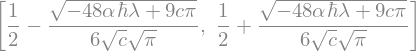

Solution 1


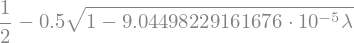

Solution 2


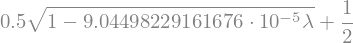

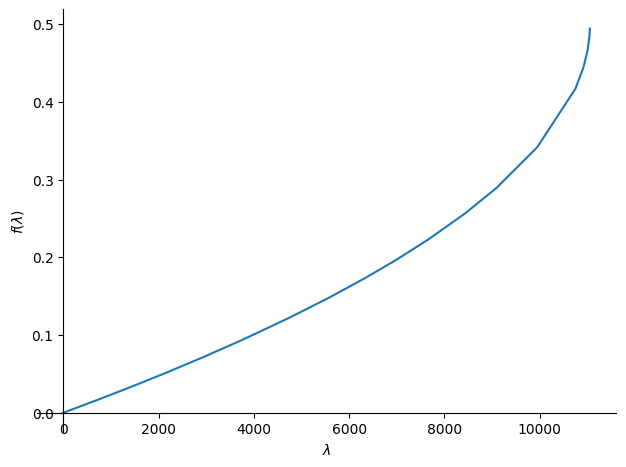

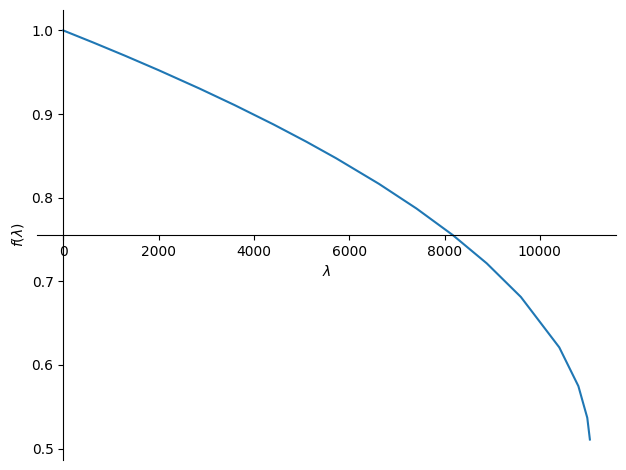

In [1]:
import numpy as np
import sympy as sp

# Enable LaTeX printing
sp.init_printing()

m_r, m, lb = sp.symbols('m_r m lambda')
hbar = sp.symbols('hbar', real=True, positive=True)  # hbar is real and positive
alpha = sp.symbols('alpha', real=True, positive=True)
c = sp.symbols('c', real=True, positive=True)
pi = sp.symbols('pi', real=True, positive=True)

expression = m / (1 - (4 * alpha / (3 * pi)) * (hbar * lb) / (m * c))
#display(expression)

# We ask what is the mass m that would give m_r = 1
solutions = sp.solve(expression-1, m)

print('Solutions:')
display(solutions)

#If we set values for the parameters:
print('Solution 1')
sol0 = solutions[0].subs([(alpha, 1/137), (c, 137), (hbar, 1), (pi, np.pi)])
display(sol0)
print('Solution 2')
sol1 = solutions[1].subs([(alpha, 1/137), (c, 137), (hbar, 1), (pi, np.pi)])
display(sol1)

# We can then plot the functions:
sp.plotting.plot(sol0, (lb, 0, 50000))
sp.plotting.plot(sol1, (lb, 0, 50000))


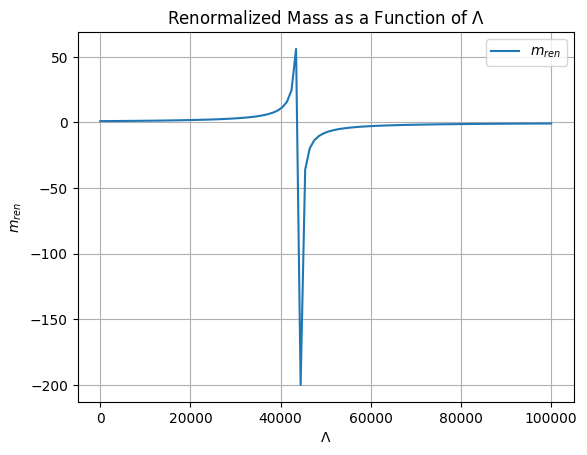

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha_fs = 1/137  # Fine-structure constant
hbar = 1          # Reduced Planck constant (set to 1 for simplicity)
c = 137            # Speed of light
m = 1             # Particle mass (set to 1 for simplicity)

# Define the range of Lambda values
Lambda_values = np.linspace(0, 100000, 100)

# Calculate the renormalized mass as a function of Lambda
m_ren = m / (1 - (4 * alpha_fs / (3 * np.pi)) * (hbar * Lambda_values) / (m * c))

# Plot the renormalized mass as a function of Lambda
plt.plot(Lambda_values, m_ren, label='$m_{ren}$')
plt.xlabel('$\Lambda$')
plt.ylabel('$m_{ren}$')
plt.title('Renormalized Mass as a Function of $\Lambda$')
plt.legend()
plt.grid(True)
plt.show()


We note that the divergences that appear in the masses (called the Landau pole of the theory) are due to approximating the effective coupling strength $\gamma_{\text{eff}}$ with (implicitly) perturabtion theory as calculated in A. 4.2. For a finite cut-off in the non-perturbative theory we usually have $\gamma_{\text{eff}}\leq 1$, yet even then we will not be able to recover the free-space dispersion by choosing an arbitrarily small but finite bare mass. Instead we will find a flat dispersion (see also the case of <font color='blue'>Notebook 3</font> for $\omega_{\text{d}} \rightarrow  \infty$ such that $\gamma \rightarrow 1$, while for perturbation theory, i.e., $\tilde{\omega} = \omega$, we find $\gamma \rightarrow \infty$). We note further, that the bare mass depends on the (energy/length) scales of the problem as will be briefly touched upon in Lec.2.1.